# 20163228 남유선

In [1]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math

In [2]:
# Normalize the values of the input data to be [0, 1]
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Distance function between two vectors x and y
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# Plot image
def plot_image(img) :
    plt.imshow(img)
    plt.axis('off')
    
    
# Plot energy
def plot_energy(energy) :
    plt.plot(energy)
    plt.show()

In [3]:
class KMeans() :
    def __init__(self, k) :
        self.k = k
        self.centroid_color = np.zeros((self.k, 3), dtype="long")
        self.centroid_count = np.zeros(self.k, dtype="int")
        self.energy_list = []
        
#     def plot_centroid(self) :
#             test_pix = np.zeros((1, 1, 3), dtype="uint8")
        
#             f = plt.figure(figsize=(6,2))
        
#             for i in range (self.k) :
#                 plt.subplot(1, self.k, i+1)
            
#                 test_pix[0, 0, :] = copy.deepcopy(self.centroid_color[i, :])
            
#                 plt.imshow(test_pix)
#                 plt.axis('off')
    
#             frame = plt.gca()
#             plt.show()
            
        
    def init_centroid(self) :
        for i in range(pix_size) :
            rand_label = random.randint(0, self.k-1)
            self.cur_center_label[i] = rand_label
            
#         print(self.cur_center_label)
        
    def update_centroid(self) :       
        self.centroid_color = np.zeros((self.k, 3), dtype="int")
        self.centroid_count = np.zeros(self.k, dtype="int")
        
        for i in range (pix_size) :
            label = self.cur_center_label[i]
            self.centroid_color[label, :] += pix[i, :]
            self.centroid_count[label]    += 1
            
        for i in range (self.k) :
            if (self.centroid_count[i] != 0) :
                self.centroid_color[i] //= self.centroid_count[i]
                
#         print(self.centroid_color)
#         print(self.centroid_count)
        
#         self.plot_centroid()
            
            
    def labeling(self) :
        energy_sum : long = 0
        
        # Label for each pixel
        for i in range (pix_size) :    
            # Calculate distance between each centroid and pix
            dist_sum = []
            for j in range (self.k) :
                dist_sum.append(distance(pix[i, :], self.centroid_color[j, :]))
                
            # Find minimum distance and it index
            min_dist  = min(dist_sum)
            min_index = dist_sum.index(min_dist)
            
            # Put index in the label
            self.cur_center_label[i] = min_index
            
            # Add distance value
            energy_sum += min_dist
            
        return energy_sum
        
    def calculate_energy(self, energy) :  
        if (energy < 0) :
            energy = abs(energy)
        return (energy / pix_size)
    
    
    def make_image(self) :
        kmeans_img_list = np.zeros((pix_size, 3), dtype="uint8")
        
        for i in range (pix_size) :
            label = self.cur_center_label[i]
            kmeans_img_list[i, :] = self.centroid_color[label, :]
            
        kmeans_img = kmeans_img_list.reshape(row_size, col_size, 3)
        
        return (kmeans_img)
        
        
    def train(self) :
        
        self.cur_center_label  = np.zeros(pix_size, dtype="uint8")
        self.prev_center_label = np.zeros(pix_size, dtype="uint8")
        
        iter = 0
        
        self.init_centroid()
        
        # One iteration
        while not (np.array_equal(self.cur_center_label, self.prev_center_label)) :
            
            iter += 1
#             print("\n=============================\n", "<",iter, ">")
            
            self.update_centroid()   # Get the color of centroid
            
            self.prev_center_label = copy.deepcopy(self.cur_center_label)
            
            energy = self.labeling()
            
            self.energy_list.append(self.calculate_energy(energy))
#             print(self.energy_list[iter - 1])
        
            # Make cur_center_label as image
            kmeans_img = self.make_image()
            # Plot image
#             plot_image(kmeans_img)
        
        # Make cur_center_label as image
        kmeans_img = self.make_image()
        
        return (kmeans_img, self.energy_list)
        
        

(960, 640, 3)
<class 'numpy.uint8'>
(614400, 3)


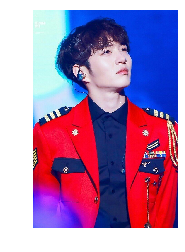

In [4]:
# Read image
im = pilimg.open("cs.jpg")

# Make and image as array
img = np.array(im)

# Show image
plt.imshow(img)
plt.axis('off')

# Check image size
print(np.shape(img))
print(type(img[0][0][0]))

row_size = len(img)
col_size = len(img[0])

# Resize Image
pix     = img.reshape(row_size * col_size, 3)
pix_size = len(pix)
print(np.shape(pix))

C:\Users\ys\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in int_scalars


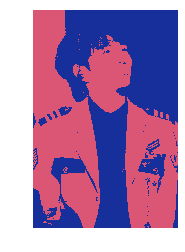

In [5]:
k_three = KMeans(2)
k_three_image, k_three_energy = k_three.train()
plot_image(k_three_image)

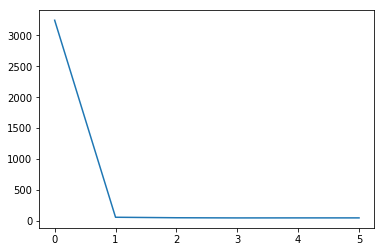

In [6]:
plot_energy(k_three_energy)

C:\Users\ys\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in int_scalars


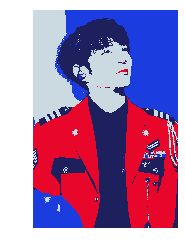

In [7]:
k_three = KMeans(4)
k_three_image, k_three_energy = k_three.train()
plot_image(k_three_image)

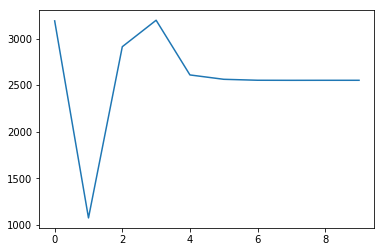

In [8]:
plot_energy(k_three_energy)

C:\Users\ys\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in int_scalars


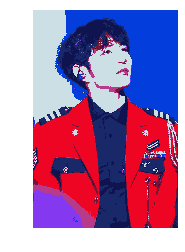

In [9]:
k_three = KMeans(8)
k_three_image, k_three_energy = k_three.train()
plot_image(k_three_image)

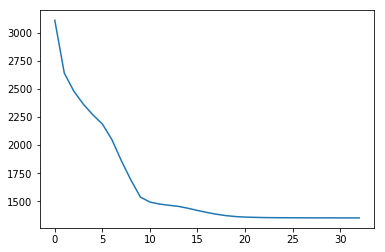

In [10]:
plot_energy(k_three_energy)

In [11]:
# k_three = KMeans(16)
# k_three_image, k_three_energy = k_three.train()
# plot_image(k_three_image)

In [12]:
# plot_energy(k_three_energy)